Analyzing Hi-C Data with Straw - Colaboratory
https://colab.research.google.com/drive/1-GG-n-p9nZ7Be82UVJG7n3Q_wQ9IeuFN?usp=sharing

In [9]:
np.array([])

array([], dtype=float64)

In [1]:
import numpy as np
import itertools as it
import os, sys
import gzip
import re

import hicstraw
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

sys.path.append('..')
from config.config_sing import *
show_env()

You are in Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log



In [2]:
%%bash
ls /data/reddylab/Kuei/out/proj_combeffect_encode_fcc

log
Readme.md
results
results_v1.tar.gz
results_v2.tar.gz
results_v3
source


In [3]:
%%bash
ls /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/source/hic_intact_K562_deep

inter.hic
localizedList_primary_10.bedpe


In [4]:
fdiry = os.path.join(FD_RES, "source", "hic_intact_K562_deep")
fname = "inter.hic"
fpath = os.path.join(fdiry, fname)
hic   = hicstraw.HiCFile(fpath)

print(hic)
print(hic.getGenomeID())
print(hic.getResolutions())

hg38
[2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000, 500, 200, 100, 50, 20, 10, 1]


In [6]:
txt_normalization = "RU"
val_resolution    = 100
txt_chrom         = "chr8"

matrix_object = hic.getMatrixZoomData(
    txt_chrom, 
    txt_chrom, 
    "oe", 
    txt_normalization, 
    "BP", 
    val_resolution)

In [13]:
#chr8	127736230	127736231
num_start1 =  127736230 - 10000
num_end1   =  127736230 + 10000

num_start2 =  127793817 - 10000	
num_end2   =  127795585 + 10000

matrix_numpy = matrix_object.getRecordsAsMatrix(
    int(num_start1),
    int(num_end1),
    int(num_start2),
    int(num_end2)
)

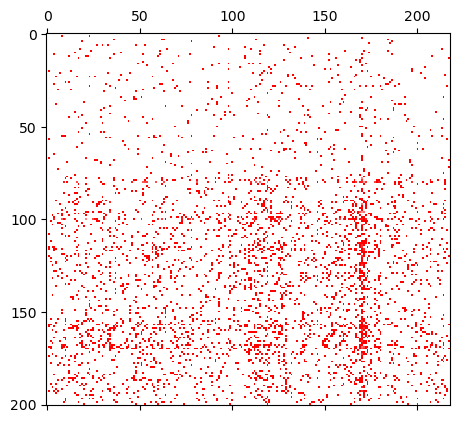

In [11]:
REDMAP = LinearSegmentedColormap.from_list("bright_red", [(1,1,1),(1,0,0)])
# helper function for plotting
def plot_hic_map(dense_matrix, maxcolor):
    plt.matshow(dense_matrix, cmap=REDMAP, vmin=0, vmax=maxcolor)
    plt.show()

plot_hic_map(matrix_numpy, 5)